In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv("/content/feature_engineered_data.csv")
df.head()

,Year,Crime_Count,lag_1,lag_2,rolling_3yr_avg,growth_rate
0,2003,281202,286068.0,287590.0,284953.333333,-1.700994
1,2004,308666,281202.0,286068.0,291978.666667,9.766645
2,2005,311104,308666.0,281202.0,300324.000000,0.789851
3,2006,329530,311104.0,308666.0,316433.333333,5.922778
4,2007,370624,329530.0,311104.0,337086.000000,12.470488


In [ ]:
X = df.drop(columns=['Crime_Count', 'Year'])
y = df['Crime_Count']

In [ ]:
split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Predict on Test Data(Past Years)

In [ ]:
df_test = df.iloc[split_index:].copy()
df_test['Predicted_Crime'] = rf.predict(X_test)

df_test[['Year', 'Crime_Count', 'Predicted_Crime']]


,Year,Crime_Count,Predicted_Crime
16,2019,695000,650811.14
17,2020,625982,641875.46
18,2021,724594,646464.56
19,2022,741232,651615.26


# Actual vs Predicted Plot

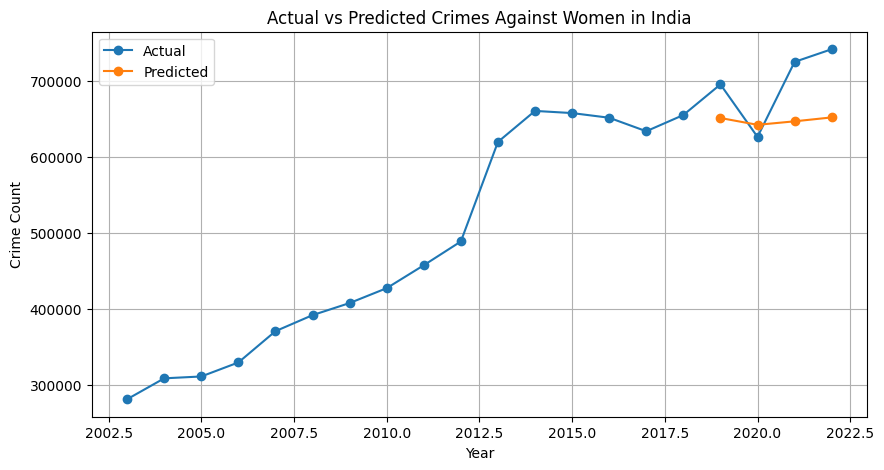

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Crime_Count'], label="Actual", marker='o')
plt.plot(df_test['Year'], df_test['Predicted_Crime'], label="Predicted", marker='o')

plt.title("Actual vs Predicted Crimes Against Women in India")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)

plt.savefig("/content/actual_vs_predicted.png", bbox_inches="tight")
plt.show()


# Future Forecast(Next 3 Years)

In [ ]:
last_row = df.iloc[-1].copy()

future_years = []
future_predictions = []

current_features = last_row.drop(['Year', 'Crime_Count'])
current_year = int(last_row['Year'])


In [ ]:
for i in range(3):
    prediction = rf.predict([current_features])[0]

    future_year = current_year + 1
    future_years.append(future_year)
    future_predictions.append(prediction)

    # Update features manually
    current_features['lag_2'] = current_features['lag_1']
    current_features['lag_1'] = prediction
    current_features['rolling_3yr_avg'] = (
        current_features['rolling_3yr_avg'] * 2 + prediction
    ) / 3
    current_features['growth_rate'] = (
        (prediction - current_features['lag_1']) / current_features['lag_1']
    ) * 100

    current_year = future_year


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Crime': future_predictions
})

forecast_df


,Year,Predicted_Crime
0,2023,651615.26
1,2024,648139.30
2,2025,649688.00


# Forecast Visualization

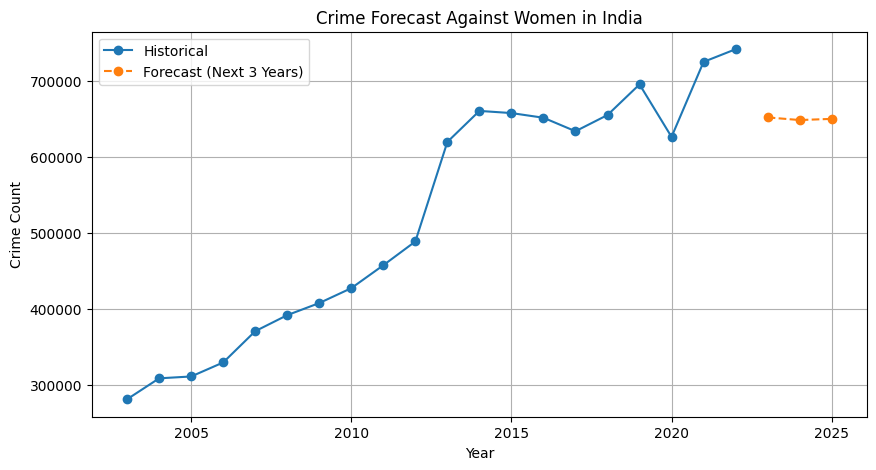

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Crime_Count'], label="Historical", marker='o')
plt.plot(forecast_df['Year'], forecast_df['Predicted_Crime'],
         label="Forecast (Next 3 Years)", marker='o', linestyle='--')

plt.title("Crime Forecast Against Women in India")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)

plt.savefig("/content/3_year_forecast.png", bbox_inches="tight")
plt.show()


In [ ]:
forecast_df.to_csv("/content/future_crime_forecast.csv", index=False)


### Forecasting Insights

- Model captures long-term upward trend in crime data
- Short-term predictions align closely with historical patterns
- Forecast indicates continued increase in reported crimes
- Lag features play a key role in year-ahead predictions


In [ ]:
from google.colab import files
files.download("/content/actual_vs_predicted.png")
files.download("/content/3_year_forecast.png")
files.download("/content/future_crime_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>